In [7]:
import pandas as pd
import numpy as np
df_ft = pd.read_csv('features_n_target.csv')
df_ft.columns.to_list()

['customer_id',
 'monetary_DNN',
 'monetary_btyd',
 'frequency_DNN',
 'frequency_btyd',
 'frequency',
 't',
 'time_between',
 'avg_basket_value',
 'avg_basket_size',
 'cnt_returns',
 'has_returned',
 'frequency_btyd_clipped',
 'monetary_btyd_clipped',
 'target_monetary_clipped',
 'target_monetary']

In [8]:
features = [
 'monetary_DNN',
 'frequency_DNN',
 'recency',
 't',
 'time_between',
 'avg_basket_value',
 'avg_basket_size',
 'cnt_returns',
 'has_returned']
numeric_f = ['monetary_DNN','frequency_DNN','recency','t',
              'time_between','avg_basket_value','avg_basket_size','cnt_returns']
cate_f = ['has_returned']

target = ['target_monetary']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_full,X_test,y_train_full,y_test = train_test_split(df_ft[features],df_ft[target],test_size = 0.2,random_state = 42)
# X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size = 0.15, random_state = 42)

scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# train_num,train_cate = X_train[:,:-1],X_train[:,-1]
# valid_num,valid_cate = X_valid[:,:-1],X_valid[:,-1]
# test_num,test_cate = X_test[:,:-1],X_test[:,-1]

np.random.seed(42)
# tf.random.set_seed(42)

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate': np.arange(0.001,0.02,0.001),
         'max_depth':np.arange(5,10,1),
         'gamma': np.arange(0,0.4,0.05),
         'subsample':[0.7,0.8], 'reg_lambda':np.arange(0,10,1),
         'colsample_bytree':[0.8,0.9]}

clf = XGBRegressor(objective='reg:squarederror',n_estimator = 2000,random_state=42)

cv = RandomizedSearchCV(clf,params,cv=3,verbose=2)


cv.fit(X_train_full,y_train_full,eval_set=[(X_train_full, y_train_full), (X_test, y_test)],early_stopping_rounds=30,
#         eval_metric='',
        verbose=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[17:08:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:12306.76269	validation_1-rmse:8342.78027
[1]	validation_0-rmse:12267.09961	validation_1-rmse:8289.19336
[2]	validation_0-rmse:12229.25195	validation_1-rmse:8236.98340
[3]	validation_0-rmse:12194.65625	validation_1-rmse:8190.49951
[4]	validation_0-rmse:12156.08984	validation_1-rmse:8139.94385
[5]	validation_0-rmse:12123.10742	validation_1-rmse:8094.99170
[6]	validation_0-rmse:12086.45410	validation_1-rmse:8045.51514
[7]	validation_0-rmse:12054.61914	validation_1-rmse:8001.45215
[8]	validation_0-rmse:12020.34570	validation_1-rmse:7954.87939
[9]	valid

[14]	validation_0-rmse:11619.21191	validation_1-rmse:7485.79834
[15]	validation_0-rmse:11583.79394	validation_1-rmse:7442.13428
[16]	validation_0-rmse:11532.63477	validation_1-rmse:7380.07812
[17]	validation_0-rmse:11487.83789	validation_1-rmse:7319.21436
[18]	validation_0-rmse:11437.34180	validation_1-rmse:7258.12061
[19]	validation_0-rmse:11396.34570	validation_1-rmse:7208.76758
[20]	validation_0-rmse:11358.73828	validation_1-rmse:7158.18018
[21]	validation_0-rmse:11319.89941	validation_1-rmse:7129.03320
[22]	validation_0-rmse:11292.06934	validation_1-rmse:7089.22559
[23]	validation_0-rmse:11246.43555	validation_1-rmse:7034.29395
[24]	validation_0-rmse:11201.66992	validation_1-rmse:6981.30811
[25]	validation_0-rmse:11163.50195	validation_1-rmse:6940.06787
[26]	validation_0-rmse:11118.47363	validation_1-rmse:6885.77588
[27]	validation_0-rmse:11090.31055	validation_1-rmse:6846.91699
[28]	validation_0-rmse:11060.16211	validation_1-rmse:6807.18848
[29]	validation_0-rmse:11035.75879	valid

[35]	validation_0-rmse:10931.95312	validation_1-rmse:6676.76074
[36]	validation_0-rmse:10901.39551	validation_1-rmse:6634.45264
[37]	validation_0-rmse:10869.12207	validation_1-rmse:6594.65234
[38]	validation_0-rmse:10837.88477	validation_1-rmse:6548.41357
[39]	validation_0-rmse:10813.49121	validation_1-rmse:6512.75147
[40]	validation_0-rmse:10783.45703	validation_1-rmse:6475.16016
[41]	validation_0-rmse:10742.29297	validation_1-rmse:6425.60010
[42]	validation_0-rmse:10708.54492	validation_1-rmse:6387.07959
[43]	validation_0-rmse:10687.17481	validation_1-rmse:6355.86133
[44]	validation_0-rmse:10650.19531	validation_1-rmse:6310.20996
[45]	validation_0-rmse:10626.41016	validation_1-rmse:6277.78760
[46]	validation_0-rmse:10589.78125	validation_1-rmse:6233.13428
[47]	validation_0-rmse:10550.59473	validation_1-rmse:6189.73730
[48]	validation_0-rmse:10511.82715	validation_1-rmse:6142.99414
[49]	validation_0-rmse:10489.35352	validation_1-rmse:6110.00830
[50]	validation_0-rmse:10450.63184	valid

[56]	validation_0-rmse:11185.48340	validation_1-rmse:6801.61670
[57]	validation_0-rmse:11168.54297	validation_1-rmse:6777.45508
[58]	validation_0-rmse:11150.25488	validation_1-rmse:6751.75586
[59]	validation_0-rmse:11130.83106	validation_1-rmse:6728.65381
[60]	validation_0-rmse:11116.83398	validation_1-rmse:6706.70459
[61]	validation_0-rmse:11097.24316	validation_1-rmse:6681.44092
[62]	validation_0-rmse:11077.92773	validation_1-rmse:6656.94189
[63]	validation_0-rmse:11063.62012	validation_1-rmse:6636.94873
[64]	validation_0-rmse:11044.36621	validation_1-rmse:6612.71631
[65]	validation_0-rmse:11025.25098	validation_1-rmse:6588.26758
[66]	validation_0-rmse:11008.94043	validation_1-rmse:6567.16504
[67]	validation_0-rmse:10989.75293	validation_1-rmse:6542.61914
[68]	validation_0-rmse:10970.91894	validation_1-rmse:6518.78174
[69]	validation_0-rmse:10952.98828	validation_1-rmse:6493.48096
[70]	validation_0-rmse:10940.90723	validation_1-rmse:6479.35791
[71]	validation_0-rmse:10925.30859	valid

[77]	validation_0-rmse:10116.99902	validation_1-rmse:5691.37353
[78]	validation_0-rmse:10091.35449	validation_1-rmse:5660.58643
[79]	validation_0-rmse:10069.81250	validation_1-rmse:5630.90234
[80]	validation_0-rmse:10044.72656	validation_1-rmse:5601.51562
[81]	validation_0-rmse:10023.13477	validation_1-rmse:5572.30322
[82]	validation_0-rmse:9997.90625	validation_1-rmse:5543.14404
[83]	validation_0-rmse:9976.60352	validation_1-rmse:5516.05811
[84]	validation_0-rmse:9953.76269	validation_1-rmse:5492.65478
[85]	validation_0-rmse:9929.18262	validation_1-rmse:5464.15283
[86]	validation_0-rmse:9903.92578	validation_1-rmse:5438.23926
[87]	validation_0-rmse:9878.81445	validation_1-rmse:5408.93506
[88]	validation_0-rmse:9853.91211	validation_1-rmse:5379.86279
[89]	validation_0-rmse:9838.31543	validation_1-rmse:5366.12988
[90]	validation_0-rmse:9814.08301	validation_1-rmse:5340.09473
[91]	validation_0-rmse:9794.08106	validation_1-rmse:5326.60547
[92]	validation_0-rmse:9769.40820	validation_1-rms

[98]	validation_0-rmse:9830.86523	validation_1-rmse:5352.31934
[99]	validation_0-rmse:9820.21387	validation_1-rmse:5336.53955
[CV] END colsample_bytree=0.9, gamma=0.0, learning_rate=0.006, max_depth=9, reg_lambda=7, subsample=0.8; total time=   0.3s
[17:08:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:12262.35059	validation_1-rmse:8306.14356
[1]	validation_0-rmse:12182.22266	validation_1-rmse:8222.54004
[2]	validation_0-rmse:12102.65137	validation_1-rmse:8160.48779
[3]	validation_0-rmse:12024.93066	validation_1-rmse:8096.31982
[4]	validation_0-rmse:11946.99805	validation_1-rmse:8040.18897
[5]	validation_0-rmse:11870.27051	validation_1-rmse:7977.05957
[6]	valid

[12]	validation_0-rmse:11010.75977	validation_1-rmse:7444.99951
[13]	validation_0-rmse:10934.72266	validation_1-rmse:7364.64551
[14]	validation_0-rmse:10835.05078	validation_1-rmse:7305.91553
[15]	validation_0-rmse:10726.75293	validation_1-rmse:7252.11328
[16]	validation_0-rmse:10631.42188	validation_1-rmse:7178.21338
[17]	validation_0-rmse:10553.94629	validation_1-rmse:7106.11133
[18]	validation_0-rmse:10459.62402	validation_1-rmse:7033.96240
[19]	validation_0-rmse:10372.49805	validation_1-rmse:6963.01465
[20]	validation_0-rmse:10290.02344	validation_1-rmse:6906.66553
[21]	validation_0-rmse:10179.89941	validation_1-rmse:6856.07422
[22]	validation_0-rmse:10114.30664	validation_1-rmse:6788.98438
[23]	validation_0-rmse:10016.41894	validation_1-rmse:6720.62500
[24]	validation_0-rmse:9921.79688	validation_1-rmse:6654.14600
[25]	validation_0-rmse:9841.63965	validation_1-rmse:6587.50781
[26]	validation_0-rmse:9751.97559	validation_1-rmse:6536.36816
[27]	validation_0-rmse:9664.09473	validatio

[34]	validation_0-rmse:9103.04199	validation_1-rmse:6311.23584
[35]	validation_0-rmse:9031.65625	validation_1-rmse:6255.58301
[36]	validation_0-rmse:8962.22266	validation_1-rmse:6209.77246
[37]	validation_0-rmse:8891.26172	validation_1-rmse:6159.30615
[38]	validation_0-rmse:8821.01953	validation_1-rmse:6110.34424
[39]	validation_0-rmse:8774.00391	validation_1-rmse:6071.61719
[40]	validation_0-rmse:8707.35156	validation_1-rmse:6027.97070
[41]	validation_0-rmse:8621.41113	validation_1-rmse:5979.23389
[42]	validation_0-rmse:8556.58496	validation_1-rmse:5937.72070
[43]	validation_0-rmse:8507.79590	validation_1-rmse:5895.25879
[44]	validation_0-rmse:8431.20508	validation_1-rmse:5854.46191
[45]	validation_0-rmse:8369.92969	validation_1-rmse:5812.16602
[46]	validation_0-rmse:8284.53223	validation_1-rmse:5768.91260
[47]	validation_0-rmse:8203.70606	validation_1-rmse:5729.04785
[48]	validation_0-rmse:8122.91064	validation_1-rmse:5684.66797
[49]	validation_0-rmse:8076.60254	validation_1-rmse:564

[56]	validation_0-rmse:9788.20312	validation_1-rmse:4901.31836
[57]	validation_0-rmse:9755.68652	validation_1-rmse:4859.88916
[58]	validation_0-rmse:9727.32422	validation_1-rmse:4818.43652
[59]	validation_0-rmse:9693.88184	validation_1-rmse:4773.80225
[60]	validation_0-rmse:9658.21289	validation_1-rmse:4729.57227
[61]	validation_0-rmse:9619.67578	validation_1-rmse:4687.17871
[62]	validation_0-rmse:9602.55371	validation_1-rmse:4646.04736
[63]	validation_0-rmse:9585.47168	validation_1-rmse:4620.04102
[64]	validation_0-rmse:9548.24316	validation_1-rmse:4579.45898
[65]	validation_0-rmse:9531.23926	validation_1-rmse:4553.20557
[66]	validation_0-rmse:9502.49023	validation_1-rmse:4519.89648
[67]	validation_0-rmse:9466.83301	validation_1-rmse:4474.77393
[68]	validation_0-rmse:9432.14941	validation_1-rmse:4432.79932
[69]	validation_0-rmse:9396.32910	validation_1-rmse:4389.85352
[70]	validation_0-rmse:9379.61231	validation_1-rmse:4368.69629
[71]	validation_0-rmse:9357.43359	validation_1-rmse:433

[79]	validation_0-rmse:7524.31641	validation_1-rmse:3212.46460
[80]	validation_0-rmse:7475.74707	validation_1-rmse:3167.98901
[81]	validation_0-rmse:7434.39307	validation_1-rmse:3128.21094
[82]	validation_0-rmse:7399.23389	validation_1-rmse:3087.07007
[83]	validation_0-rmse:7358.70654	validation_1-rmse:3047.88574
[84]	validation_0-rmse:7312.22656	validation_1-rmse:3008.93652
[85]	validation_0-rmse:7269.37891	validation_1-rmse:2987.84253
[86]	validation_0-rmse:7223.82178	validation_1-rmse:2949.79297
[87]	validation_0-rmse:7186.01514	validation_1-rmse:2939.40820
[88]	validation_0-rmse:7142.41650	validation_1-rmse:2904.79492
[89]	validation_0-rmse:7117.75928	validation_1-rmse:2894.92822
[90]	validation_0-rmse:7074.79834	validation_1-rmse:2874.45898
[91]	validation_0-rmse:7036.20996	validation_1-rmse:2864.66504
[92]	validation_0-rmse:6992.16504	validation_1-rmse:2826.75195
[93]	validation_0-rmse:6954.92236	validation_1-rmse:2793.36255
[94]	validation_0-rmse:6919.02441	validation_1-rmse:275

[0]	validation_0-rmse:12249.04004	validation_1-rmse:8287.29199
[1]	validation_0-rmse:12160.49512	validation_1-rmse:8196.87207
[2]	validation_0-rmse:12069.27441	validation_1-rmse:8097.42041
[3]	validation_0-rmse:11990.97559	validation_1-rmse:8008.90186
[4]	validation_0-rmse:11904.11719	validation_1-rmse:7917.87207
[5]	validation_0-rmse:11826.97363	validation_1-rmse:7830.44482
[6]	validation_0-rmse:11736.28711	validation_1-rmse:7749.05029
[7]	validation_0-rmse:11662.22266	validation_1-rmse:7655.46045
[8]	validation_0-rmse:11575.56543	validation_1-rmse:7563.07178
[9]	validation_0-rmse:11523.66602	validation_1-rmse:7496.11621
[10]	validation_0-rmse:11441.42676	validation_1-rmse:7409.95898
[11]	validation_0-rmse:11382.57324	validation_1-rmse:7332.48047
[12]	validation_0-rmse:11330.80469	validation_1-rmse:7274.32422
[13]	validation_0-rmse:11260.82227	validation_1-rmse:7195.17676
[14]	validation_0-rmse:11195.27051	validation_1-rmse:7110.78662
[15]	validation_0-rmse:11138.26269	validation_1-rm

[22]	validation_0-rmse:9855.15332	validation_1-rmse:6333.64209
[23]	validation_0-rmse:9751.33887	validation_1-rmse:6244.02393
[24]	validation_0-rmse:9649.33984	validation_1-rmse:6152.12109
[25]	validation_0-rmse:9558.06250	validation_1-rmse:6063.83594
[26]	validation_0-rmse:9461.02344	validation_1-rmse:6001.77734
[27]	validation_0-rmse:9386.26953	validation_1-rmse:5945.97363
[28]	validation_0-rmse:9321.57324	validation_1-rmse:5903.39990
[29]	validation_0-rmse:9269.61523	validation_1-rmse:5837.19238
[30]	validation_0-rmse:9225.93555	validation_1-rmse:5803.76221
[31]	validation_0-rmse:9162.21387	validation_1-rmse:5754.04883
[32]	validation_0-rmse:9069.93848	validation_1-rmse:5717.63916
[33]	validation_0-rmse:8976.10938	validation_1-rmse:5630.20020
[34]	validation_0-rmse:8902.53027	validation_1-rmse:5556.63818
[35]	validation_0-rmse:8830.33984	validation_1-rmse:5483.64160
[36]	validation_0-rmse:8748.28418	validation_1-rmse:5407.61035
[37]	validation_0-rmse:8667.22168	validation_1-rmse:532

[44]	validation_0-rmse:8112.75732	validation_1-rmse:5321.40869
[45]	validation_0-rmse:8059.77832	validation_1-rmse:5280.92529
[46]	validation_0-rmse:7966.02686	validation_1-rmse:5232.91064
[47]	validation_0-rmse:7880.78857	validation_1-rmse:5187.97070
[48]	validation_0-rmse:7797.34473	validation_1-rmse:5140.56982
[49]	validation_0-rmse:7756.46924	validation_1-rmse:5091.50391
[50]	validation_0-rmse:7672.74463	validation_1-rmse:5046.28320
[51]	validation_0-rmse:7618.26025	validation_1-rmse:5005.74707
[52]	validation_0-rmse:7536.21631	validation_1-rmse:4964.16602
[53]	validation_0-rmse:7455.45117	validation_1-rmse:4922.40918
[54]	validation_0-rmse:7397.83496	validation_1-rmse:4879.93018
[55]	validation_0-rmse:7319.43652	validation_1-rmse:4842.18506
[56]	validation_0-rmse:7270.02539	validation_1-rmse:4775.72900
[57]	validation_0-rmse:7191.78076	validation_1-rmse:4735.99707
[58]	validation_0-rmse:7110.19336	validation_1-rmse:4698.55615
[59]	validation_0-rmse:7034.45850	validation_1-rmse:466

[65]	validation_0-rmse:10842.87598	validation_1-rmse:6343.29834
[66]	validation_0-rmse:10824.97656	validation_1-rmse:6320.05078
[67]	validation_0-rmse:10803.65137	validation_1-rmse:6292.75098
[68]	validation_0-rmse:10782.73340	validation_1-rmse:6266.29443
[69]	validation_0-rmse:10761.79883	validation_1-rmse:6239.69287
[70]	validation_0-rmse:10748.53223	validation_1-rmse:6224.13770
[71]	validation_0-rmse:10731.47363	validation_1-rmse:6200.43945
[72]	validation_0-rmse:10719.17969	validation_1-rmse:6181.77881
[73]	validation_0-rmse:10699.91309	validation_1-rmse:6157.19727
[74]	validation_0-rmse:10680.04981	validation_1-rmse:6131.63574
[75]	validation_0-rmse:10659.56055	validation_1-rmse:6103.96973
[76]	validation_0-rmse:10647.15137	validation_1-rmse:6084.77881
[77]	validation_0-rmse:10631.29199	validation_1-rmse:6061.80859
[78]	validation_0-rmse:10614.40820	validation_1-rmse:6038.46826
[79]	validation_0-rmse:10598.76562	validation_1-rmse:6016.14111
[80]	validation_0-rmse:10578.65527	valid

[86]	validation_0-rmse:9586.00098	validation_1-rmse:5072.32910
[87]	validation_0-rmse:9558.16797	validation_1-rmse:5039.81689
[88]	validation_0-rmse:9530.63769	validation_1-rmse:5007.85889
[89]	validation_0-rmse:9513.45508	validation_1-rmse:4992.30127
[90]	validation_0-rmse:9488.16699	validation_1-rmse:4963.77539
[91]	validation_0-rmse:9466.01758	validation_1-rmse:4949.20605
[92]	validation_0-rmse:9438.82910	validation_1-rmse:4917.71436
[93]	validation_0-rmse:9414.26074	validation_1-rmse:4888.47363
[94]	validation_0-rmse:9392.57031	validation_1-rmse:4860.38867
[95]	validation_0-rmse:9370.37891	validation_1-rmse:4846.60742
[96]	validation_0-rmse:9352.56445	validation_1-rmse:4821.24023
[97]	validation_0-rmse:9326.82617	validation_1-rmse:4791.04688
[98]	validation_0-rmse:9301.67090	validation_1-rmse:4761.79346
[99]	validation_0-rmse:9287.10742	validation_1-rmse:4741.14062
[CV] END colsample_bytree=0.9, gamma=0.15000000000000002, learning_rate=0.007, max_depth=8, reg_lambda=7, subsample=0.

[1]	validation_0-rmse:12272.75195	validation_1-rmse:8307.63477
[2]	validation_0-rmse:12237.20606	validation_1-rmse:8268.64356
[3]	validation_0-rmse:12206.11816	validation_1-rmse:8229.79981
[4]	validation_0-rmse:12171.50391	validation_1-rmse:8186.81738
[5]	validation_0-rmse:12140.71582	validation_1-rmse:8147.89600
[6]	validation_0-rmse:12107.26562	validation_1-rmse:8106.67969
[7]	validation_0-rmse:12076.62695	validation_1-rmse:8068.14648
[8]	validation_0-rmse:12041.46777	validation_1-rmse:8029.86572
[9]	validation_0-rmse:12020.22559	validation_1-rmse:8002.60254
[10]	validation_0-rmse:11986.36719	validation_1-rmse:7960.44092
[11]	validation_0-rmse:11961.38086	validation_1-rmse:7926.15869
[12]	validation_0-rmse:11939.71094	validation_1-rmse:7895.62695
[13]	validation_0-rmse:11909.68457	validation_1-rmse:7857.82227
[14]	validation_0-rmse:11880.51562	validation_1-rmse:7825.51709
[15]	validation_0-rmse:11856.65234	validation_1-rmse:7793.35352
[16]	validation_0-rmse:11823.57129	validation_1-r

[22]	validation_0-rmse:11345.70606	validation_1-rmse:7481.69824
[23]	validation_0-rmse:11302.70117	validation_1-rmse:7442.60107
[24]	validation_0-rmse:11260.12207	validation_1-rmse:7402.33203
[25]	validation_0-rmse:11221.31348	validation_1-rmse:7364.92383
[26]	validation_0-rmse:11179.24512	validation_1-rmse:7340.21094
[27]	validation_0-rmse:11149.31543	validation_1-rmse:7298.18652
[28]	validation_0-rmse:11120.84375	validation_1-rmse:7278.84131
[29]	validation_0-rmse:11095.43555	validation_1-rmse:7246.50293
[30]	validation_0-rmse:11074.50684	validation_1-rmse:7229.63330
[31]	validation_0-rmse:11048.39453	validation_1-rmse:7205.10303
[32]	validation_0-rmse:11007.27148	validation_1-rmse:7182.64697
[33]	validation_0-rmse:10963.68945	validation_1-rmse:7138.29004
[34]	validation_0-rmse:10934.14941	validation_1-rmse:7120.72607
[35]	validation_0-rmse:10900.23144	validation_1-rmse:7081.95068
[36]	validation_0-rmse:10862.79102	validation_1-rmse:7045.36621
[37]	validation_0-rmse:10825.51074	valid

[43]	validation_0-rmse:10644.41406	validation_1-rmse:6881.47217
[44]	validation_0-rmse:10612.06934	validation_1-rmse:6858.40137
[45]	validation_0-rmse:10585.78809	validation_1-rmse:6837.28564
[46]	validation_0-rmse:10543.59668	validation_1-rmse:6808.63525
[47]	validation_0-rmse:10502.68848	validation_1-rmse:6783.76660
[48]	validation_0-rmse:10460.59473	validation_1-rmse:6755.41504
[49]	validation_0-rmse:10435.67871	validation_1-rmse:6724.11914
[50]	validation_0-rmse:10394.44238	validation_1-rmse:6697.52148
[51]	validation_0-rmse:10364.50879	validation_1-rmse:6676.32520
[52]	validation_0-rmse:10324.13281	validation_1-rmse:6651.35352
[53]	validation_0-rmse:10283.83594	validation_1-rmse:6626.53760
[54]	validation_0-rmse:10253.30762	validation_1-rmse:6590.13135
[55]	validation_0-rmse:10213.32227	validation_1-rmse:6565.08691
[56]	validation_0-rmse:10182.45606	validation_1-rmse:6527.94385
[57]	validation_0-rmse:10142.25977	validation_1-rmse:6501.79248
[58]	validation_0-rmse:10102.90820	valid

[65]	validation_0-rmse:8646.68750	validation_1-rmse:3828.01245
[66]	validation_0-rmse:8617.13184	validation_1-rmse:3792.26538
[67]	validation_0-rmse:8570.40723	validation_1-rmse:3762.26831
[68]	validation_0-rmse:8524.47949	validation_1-rmse:3734.75317
[69]	validation_0-rmse:8479.04883	validation_1-rmse:3706.17114
[70]	validation_0-rmse:8459.73731	validation_1-rmse:3682.01611
[71]	validation_0-rmse:8425.20410	validation_1-rmse:3643.60864
[72]	validation_0-rmse:8408.96289	validation_1-rmse:3625.08398
[73]	validation_0-rmse:8365.85840	validation_1-rmse:3604.35230
[74]	validation_0-rmse:8323.14356	validation_1-rmse:3583.58228
[75]	validation_0-rmse:8280.24219	validation_1-rmse:3557.79028
[76]	validation_0-rmse:8264.44336	validation_1-rmse:3532.79761
[77]	validation_0-rmse:8238.85644	validation_1-rmse:3500.68774
[78]	validation_0-rmse:8206.57422	validation_1-rmse:3465.56348
[79]	validation_0-rmse:8179.30713	validation_1-rmse:3443.21802
[80]	validation_0-rmse:8138.25928	validation_1-rmse:342

[87]	validation_0-rmse:5511.24561	validation_1-rmse:2512.71558
[88]	validation_0-rmse:5464.74902	validation_1-rmse:2484.07666
[89]	validation_0-rmse:5438.27783	validation_1-rmse:2470.75830
[90]	validation_0-rmse:5394.07324	validation_1-rmse:2448.91772
[91]	validation_0-rmse:5347.35693	validation_1-rmse:2428.69165
[92]	validation_0-rmse:5303.25635	validation_1-rmse:2408.08374
[93]	validation_0-rmse:5266.38721	validation_1-rmse:2383.41016
[94]	validation_0-rmse:5232.45410	validation_1-rmse:2349.28882
[95]	validation_0-rmse:5191.05664	validation_1-rmse:2328.22217
[96]	validation_0-rmse:5158.24463	validation_1-rmse:2297.25952
[97]	validation_0-rmse:5109.15772	validation_1-rmse:2266.44629
[98]	validation_0-rmse:5065.83301	validation_1-rmse:2248.12622
[99]	validation_0-rmse:5047.45898	validation_1-rmse:2230.96924
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.018000000000000002, max_depth=9, reg_lambda=2, subsample=0.7; total time=   0.3s
[17:08:25] WARNING: /Users/travis/build/d

[1]	validation_0-rmse:12241.97754	validation_1-rmse:8253.60547
[2]	validation_0-rmse:12192.84277	validation_1-rmse:8187.24658
[3]	validation_0-rmse:12147.10059	validation_1-rmse:8126.71289
[4]	validation_0-rmse:12096.07324	validation_1-rmse:8059.44922
[5]	validation_0-rmse:12052.50781	validation_1-rmse:8000.07373
[6]	validation_0-rmse:12004.39941	validation_1-rmse:7934.11670
[7]	validation_0-rmse:11963.36914	validation_1-rmse:7877.33594
[8]	validation_0-rmse:11919.21875	validation_1-rmse:7817.31299
[9]	validation_0-rmse:11888.57910	validation_1-rmse:7773.32422
[10]	validation_0-rmse:11844.31348	validation_1-rmse:7713.85498
[11]	validation_0-rmse:11810.34082	validation_1-rmse:7663.99219
[12]	validation_0-rmse:11781.05469	validation_1-rmse:7623.10596
[13]	validation_0-rmse:11740.63672	validation_1-rmse:7566.94824
[14]	validation_0-rmse:11701.84668	validation_1-rmse:7514.08008
[15]	validation_0-rmse:11670.18652	validation_1-rmse:7465.50195
[16]	validation_0-rmse:11628.20898	validation_1-r

[22]	validation_0-rmse:11005.31250	validation_1-rmse:6671.18652
[23]	validation_0-rmse:10949.91602	validation_1-rmse:6603.67432
[24]	validation_0-rmse:10896.31445	validation_1-rmse:6536.29297
[25]	validation_0-rmse:10850.71875	validation_1-rmse:6485.13330
[26]	validation_0-rmse:10795.57812	validation_1-rmse:6418.13623
[27]	validation_0-rmse:10762.63769	validation_1-rmse:6370.38281
[28]	validation_0-rmse:10727.30078	validation_1-rmse:6322.35693
[29]	validation_0-rmse:10698.69531	validation_1-rmse:6280.69727
[30]	validation_0-rmse:10668.21387	validation_1-rmse:6246.68018
[31]	validation_0-rmse:10634.00586	validation_1-rmse:6196.38086
[32]	validation_0-rmse:10582.59180	validation_1-rmse:6132.96484
[33]	validation_0-rmse:10528.60644	validation_1-rmse:6068.06836
[34]	validation_0-rmse:10487.63965	validation_1-rmse:6014.06006
[35]	validation_0-rmse:10441.25781	validation_1-rmse:5951.29883
[36]	validation_0-rmse:10397.47363	validation_1-rmse:5891.44922
[37]	validation_0-rmse:10354.52148	valid

[43]	validation_0-rmse:10310.37793	validation_1-rmse:5821.99951
[44]	validation_0-rmse:10266.66016	validation_1-rmse:5768.11084
[45]	validation_0-rmse:10239.64258	validation_1-rmse:5730.97510
[46]	validation_0-rmse:10196.18945	validation_1-rmse:5678.19727
[47]	validation_0-rmse:10149.94434	validation_1-rmse:5626.27197
[48]	validation_0-rmse:10103.67773	validation_1-rmse:5570.94434
[49]	validation_0-rmse:10077.60547	validation_1-rmse:5532.27734
[50]	validation_0-rmse:10031.87402	validation_1-rmse:5477.00293
[51]	validation_0-rmse:9994.96191	validation_1-rmse:5433.74121
[52]	validation_0-rmse:9949.21875	validation_1-rmse:5379.42285
[53]	validation_0-rmse:9906.07812	validation_1-rmse:5330.23438
[54]	validation_0-rmse:9875.43066	validation_1-rmse:5283.00781
[55]	validation_0-rmse:9832.31055	validation_1-rmse:5235.16748
[56]	validation_0-rmse:9802.00684	validation_1-rmse:5188.23340
[57]	validation_0-rmse:9759.06250	validation_1-rmse:5138.18750
[58]	validation_0-rmse:9721.72852	validation_1-

[64]	validation_0-rmse:10600.00684	validation_1-rmse:6227.24609
[65]	validation_0-rmse:10581.01172	validation_1-rmse:6201.68603
[66]	validation_0-rmse:10559.85352	validation_1-rmse:6176.83691
[67]	validation_0-rmse:10535.31836	validation_1-rmse:6144.71094
[68]	validation_0-rmse:10510.81445	validation_1-rmse:6113.87549
[69]	validation_0-rmse:10486.05566	validation_1-rmse:6085.79541
[70]	validation_0-rmse:10467.76269	validation_1-rmse:6060.67432
[71]	validation_0-rmse:10446.02637	validation_1-rmse:6034.85693
[72]	validation_0-rmse:10434.91797	validation_1-rmse:6019.49707
[73]	validation_0-rmse:10410.26856	validation_1-rmse:5991.66602
[74]	validation_0-rmse:10387.60938	validation_1-rmse:5961.91992
[75]	validation_0-rmse:10364.80371	validation_1-rmse:5932.36426
[76]	validation_0-rmse:10349.83106	validation_1-rmse:5910.37891
[77]	validation_0-rmse:10329.91797	validation_1-rmse:5886.27100
[78]	validation_0-rmse:10310.30371	validation_1-rmse:5860.49951
[79]	validation_0-rmse:10290.88965	valid

[85]	validation_0-rmse:9052.59082	validation_1-rmse:5462.31397
[86]	validation_0-rmse:9018.54297	validation_1-rmse:5429.44287
[87]	validation_0-rmse:8984.55566	validation_1-rmse:5403.96582
[88]	validation_0-rmse:8952.23144	validation_1-rmse:5373.58203
[89]	validation_0-rmse:8929.55078	validation_1-rmse:5360.35986
[90]	validation_0-rmse:8898.07227	validation_1-rmse:5342.91455
[91]	validation_0-rmse:8867.36133	validation_1-rmse:5329.10156
[92]	validation_0-rmse:8835.61133	validation_1-rmse:5299.14404
[93]	validation_0-rmse:8806.67871	validation_1-rmse:5271.67969
[94]	validation_0-rmse:8778.05859	validation_1-rmse:5237.17822
[95]	validation_0-rmse:8747.05371	validation_1-rmse:5218.60986
[96]	validation_0-rmse:8720.70898	validation_1-rmse:5186.55469
[97]	validation_0-rmse:8687.50000	validation_1-rmse:5154.85107
[98]	validation_0-rmse:8656.07129	validation_1-rmse:5125.19434
[99]	validation_0-rmse:8636.26856	validation_1-rmse:5100.85840
[CV] END colsample_bytree=0.8, gamma=0.1500000000000000

[1]	validation_0-rmse:12049.11426	validation_1-rmse:8139.99512
[2]	validation_0-rmse:11936.17676	validation_1-rmse:7998.85449
[3]	validation_0-rmse:11826.35059	validation_1-rmse:7862.50488
[4]	validation_0-rmse:11712.28809	validation_1-rmse:7755.42285
[5]	validation_0-rmse:11620.28613	validation_1-rmse:7666.77295
[6]	validation_0-rmse:11487.35644	validation_1-rmse:7530.38623
[7]	validation_0-rmse:11346.73535	validation_1-rmse:7438.25342
[8]	validation_0-rmse:11219.40918	validation_1-rmse:7348.93555
[9]	validation_0-rmse:11102.66602	validation_1-rmse:7254.07520
[10]	validation_0-rmse:10976.70898	validation_1-rmse:7157.93506
[11]	validation_0-rmse:10882.19434	validation_1-rmse:7043.55762
[12]	validation_0-rmse:10786.32227	validation_1-rmse:6951.23389
[13]	validation_0-rmse:10680.04883	validation_1-rmse:6838.51611
[14]	validation_0-rmse:10555.69727	validation_1-rmse:6758.50977
[15]	validation_0-rmse:10453.47363	validation_1-rmse:6688.61523
[16]	validation_0-rmse:10355.29590	validation_1-r

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimator=2000, n...
                                          verbosity=None),
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'gamma': array([0. 

In [28]:
cv.best_params_

{'subsample': 0.7,
 'reg_lambda': 2,
 'max_depth': 9,
 'learning_rate': 0.018000000000000002,
 'gamma': 0.25,
 'colsample_bytree': 0.8}

In [29]:
xgb = XGBRegressor(learning_rate = 0.018,
                   max_depth = 9,
                   n_estimators = 2000,
                   gamma = 0.25,
                   subsmaple = 0.7,
                   reg_lambda = 2,
                   objective='reg:squarederror',
                  colsample_bytree = 0.8)
xgb.fit(X_train_full,y_train_full,eval_set=[(X_train_full, y_train_full), (X_test, y_test)], 
        early_stopping_rounds=30,
#         eval_metric='',
        verbose=True)


[17:09:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "subsmaple" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:12188.05469	validation_1-rmse:8276.88086
[1]	validation_0-rmse:12048.92578	validation_1-rmse:8172.13184
[2]	validation_0-rmse:11898.80176	validation_1-rmse:8068.20215
[3]	validation_0-rmse:11750.94922	validation_1-rmse:7966.01416
[4]	validation_0-rmse:11604.12695	validation_1-rmse:7858.15186
[5]	validation_0-rmse:11460.71289	validation_1-rmse:7759.48486
[6]	validation_0-rmse:11331.62109	validation_1-rmse:7663.14795
[7]	validation_0-rmse:11192.29492	validation_1-rmse:7567.27734
[8]	validation_0-rmse:11070.04102	validation_1-rmse:7457.95654
[9]	validation_0-rmse:10934.62793	validation_1-rmse:7365.07715
[10]	vali

[124]	validation_0-rmse:3618.45581	validation_1-rmse:2807.02197
[125]	validation_0-rmse:3590.87793	validation_1-rmse:2797.20996
[126]	validation_0-rmse:3563.04981	validation_1-rmse:2790.38062
[127]	validation_0-rmse:3536.08520	validation_1-rmse:2780.96436
[128]	validation_0-rmse:3509.47485	validation_1-rmse:2771.78711
[129]	validation_0-rmse:3482.90942	validation_1-rmse:2766.17017
[130]	validation_0-rmse:3456.90723	validation_1-rmse:2757.48193
[131]	validation_0-rmse:3431.19482	validation_1-rmse:2748.92481
[132]	validation_0-rmse:3405.82007	validation_1-rmse:2740.41162
[133]	validation_0-rmse:3380.47949	validation_1-rmse:2732.14062
[134]	validation_0-rmse:3355.39893	validation_1-rmse:2731.05225
[135]	validation_0-rmse:3330.65088	validation_1-rmse:2723.57788
[136]	validation_0-rmse:3306.43921	validation_1-rmse:2716.04053
[137]	validation_0-rmse:3283.00781	validation_1-rmse:2708.59521
[138]	validation_0-rmse:3259.16577	validation_1-rmse:2701.53540
[139]	validation_0-rmse:3235.70044	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.25, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.018, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=1,
             subsmaple=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
pred  = xgb.predict(X_test)
error = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print('Root Mean Squared Error:',np.sqrt(error),
      '\nR Score:',r2,
     '\nMean Absolute Error:',mean_absolute_error(y_test,pred))

Root Mean Squared Error: 2537.171079583678 
R Score: 0.8838532939450224 
Mean Absolute Error: 850.5439209148842


In [38]:
import shap

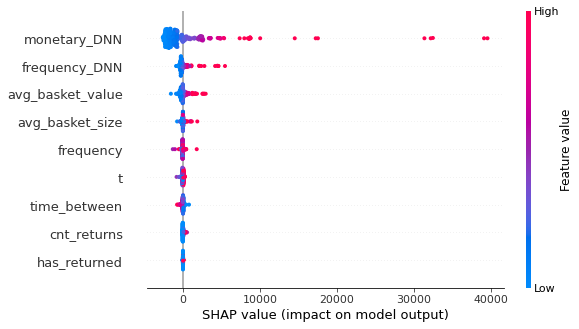

In [43]:
shap.initjs()
explainer =shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, color='teal',feature_names = features)

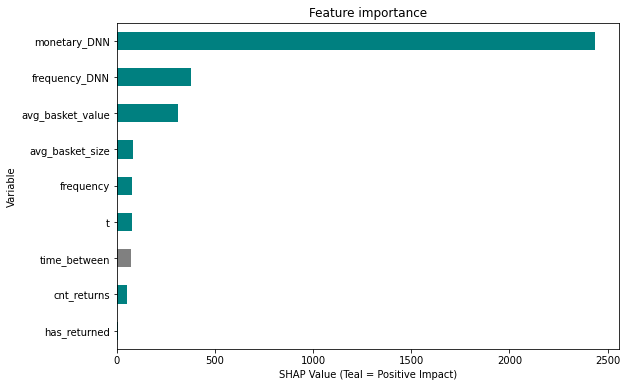

In [57]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'teal','grey')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(9,6),legend=False)
    ax.set_xlabel("SHAP Value (Teal = Positive Impact)")
    ax.set_title('Feature importance')
    return corr_df

df_test = pd.DataFrame(X_test,columns=features)
corr = ABS_SHAP(shap_values,df_test)

In [54]:
feature_importance = pd.DataFrame(np.mean(np.abs(shap_values),axis=0),index=features,columns=['importance_value'])
feature_importance.importance_value.sort_values(ascending=False)

monetary_DNN        2437.123779
frequency_DNN        379.504333
avg_basket_value     308.914520
avg_basket_size       80.602852
frequency             76.698837
t                     74.702515
time_between          69.655312
cnt_returns           48.718800
has_returned           7.221072
Name: importance_value, dtype: float32